# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# print(iris_df.columns)

| sepal length (cm)   | sepal width (cm)   | petal length (cm)   | petal width (cm)   | target   |
|:--------------------|:-------------------|:--------------------|:-------------------|:---------|
| 5.1                 | 3.5                | 1.4                 | 0.2                | 0        |
| 4.9                 | 3                  | 1.4                 | 0.2                | 0        |
| 4.7                 | 3.2                | 1.3                 | 0.2                | 0        |
| 4.6                 | 3.1                | 1.5                 | 0.2                | 0        |
| 5                   | 3.6                | 1.4                 | 0.2                | 0        |
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC

SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)
print(SVMmodel.get_params())
score = SVMmodel.score(X_test, y_test)
print(f"Model score: {score}")

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Model score: 1.0


Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
X_2f = iris_df.iloc[:,:2].values

X_2f = X_2f[iris_df['target']!= 2]
y_2f = iris.target[iris_df['target']!= 2]

X_train_2f, X_test_2f, y_train_2f, y_test_2f = train_test_split(
    X_2f, y_2f, test_size=0.2, random_state=42
)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

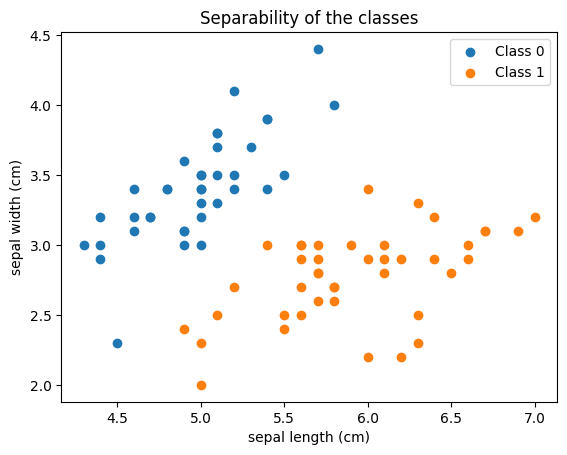

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train_2f[y_train_2f == 0, 0], X_train_2f[y_train_2f == 0, 1], label='Class 0')
plt.scatter(X_train_2f[y_train_2f == 1, 0], X_train_2f[y_train_2f == 1, 1], label='Class 1')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title('Separability of the classes')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
SVMmodel_2f = SVC(kernel='linear', C=200)

SVMmodel_2f.fit(X_train_2f, y_train_2f)

score_2f = SVMmodel_2f.score(X_test_2f, y_test_2f)
print(f"Model score: {score_2f}")

Model score: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

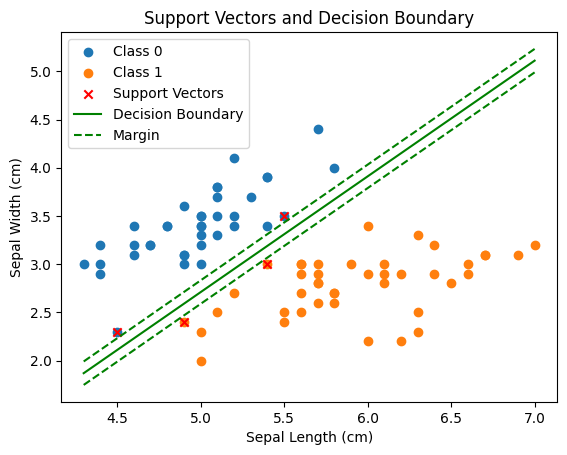

In [ ]:
import numpy as np

support_vectors = SVMmodel_2f.support_vectors_

plt.scatter(X_train_2f[y_train_2f == 0, 0], X_train_2f[y_train_2f == 0, 1], label='Class 0')
plt.scatter(X_train_2f[y_train_2f == 1, 0], X_train_2f[y_train_2f == 1, 1], label='Class 1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

w = SVMmodel_2f.coef_[0]; b = SVMmodel_2f.intercept_[0]
x_points = np.linspace(X_train_2f[:, 0].min(), X_train_2f[:, 0].max(), 100)
y_points = -(w[0] / w[1]) * x_points - b / w[1]

plt.plot(x_points, y_points, color='green', label='Decision Boundary')
margin = 1 / np.sqrt(np.sum(w**2))
y_points_up = y_points + margin
y_points_down = y_points - margin

plt.plot(x_points, y_points_up, color='green', linestyle='dashed', label='Margin')
plt.plot(x_points, y_points_down, color='green', linestyle='dashed')
plt.xlabel('Sepal Length (cm)'); plt.ylabel('Sepal Width (cm)')
plt.legend(); plt.title('Support Vectors and Decision Boundary')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

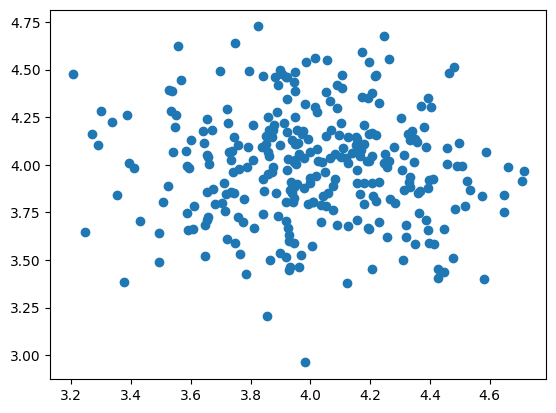

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)

x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

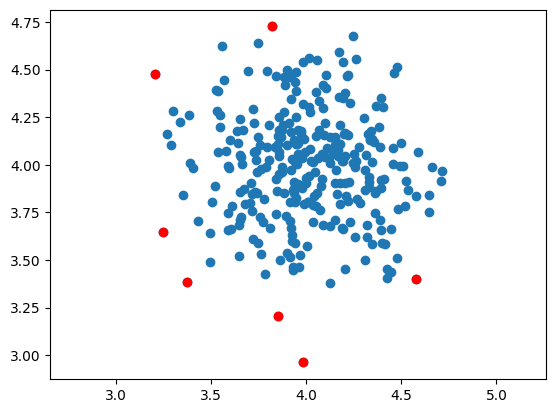

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

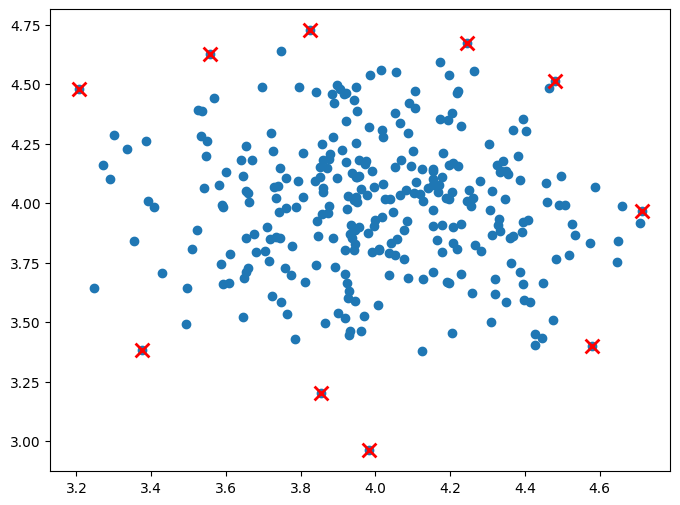

In [ ]:
plt.figure(figsize=(8, 6)) # added figure
plt.scatter(x[:, 0], x[:, 1], label='Data Points')
plt.scatter(SVMmodelOne.support_vectors_[:, 0], SVMmodelOne.support_vectors_[:, 1],
            color='red', marker='x', label='Support Vectors', s=100, linewidth=2)

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


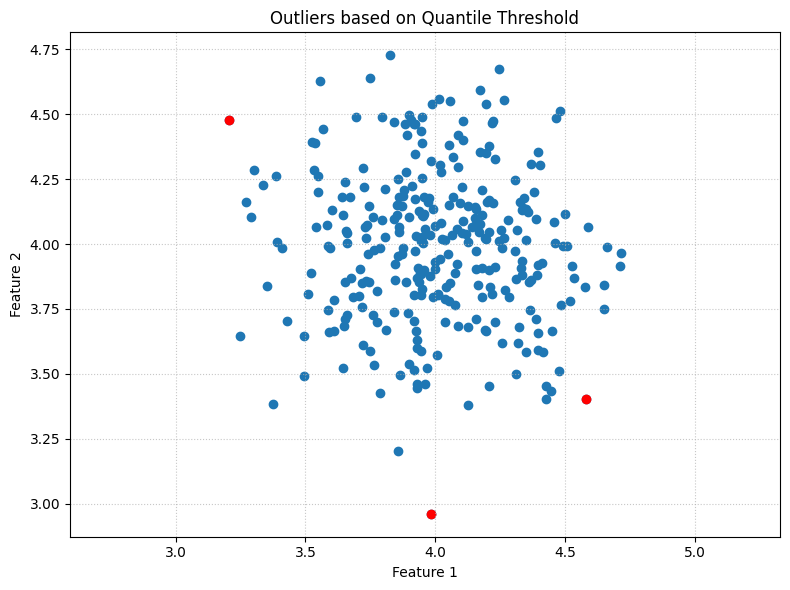

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers based on Quantile Threshold')
plt.grid(True, linestyle= ':', alpha = 0.7)
plt.tight_layout()
plt.show()